In [1]:
# Homework 3, Assignment 1
# Michael Sampson (mms991)
__author__ = 'mms991'

In [2]:
from __future__ import print_function
import pylab as pl
%pylab inline

from scipy.optimize import curve_fit, minimize
import numpy as np

import seaborn

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
distributions = ['gaus','pois','binomial','chisq','gamma']

In [4]:
np.random.seed(991)
mymean = (np.random.rand(10)[4]*20)
mymean = mymean.astype(int)
mymean

sims= 100

In [5]:

distdict = {}
distdict['gaus'] = {}
distdict['pois'] = {}
distdict['binomial'] = {}
distdict['chisq'] = {}
distdict['gamma'] = {}

distdict

{'binomial': {}, 'chisq': {}, 'gamma': {}, 'gaus': {}, 'pois': {}}

In [6]:
sampsizes = (2000 / (np.array(range(1, 100)))).astype(int)
print(sampsizes[:10],sampsizes.shape)

[2000 1000  666  500  400  333  285  250  222  200] (99,)


In [7]:
for n in sampsizes:
    distdict['gaus'][n] = np.random.normal(loc = mymean, scale = 2, size = n)
    distdict['pois'][n] = np.random.poisson(mymean, size = n)
    distdict['binomial'][n] = np.random.binomial(n = mymean*2, p = 0.5 , size = n)
    distdict['chisq'][n] = np.random.chisquare(df= mymean, size = n)
    distdict['gamma'][n] = np.random.gamma(shape = mymean/2, scale = 2, size = n)

In [8]:
distdict.keys()

['chisq', 'pois', 'gaus', 'gamma', 'binomial']

In [9]:
distdict['gaus']['means'] = {}
distdict['pois']['means'] = {}
distdict['binomial']['means'] = {}
distdict['chisq']['means'] = {}
distdict['gamma']['means'] = {}

In [10]:
for d in np.arange(0,5):
    for nn in distdict[distributions[d]]:
        if not type(nn) == str:
            distdict[distributions[d]]['means'][nn] = distdict[distributions[d]][nn].mean()

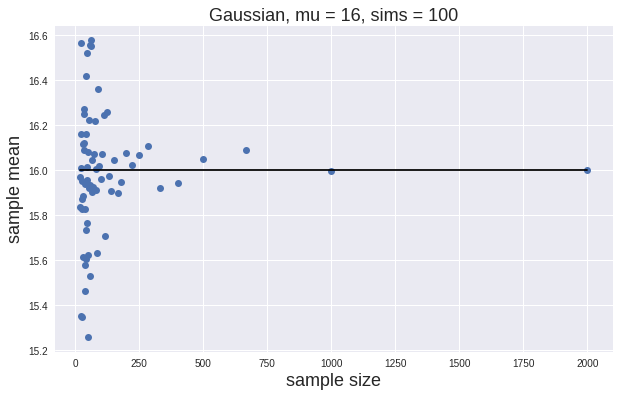

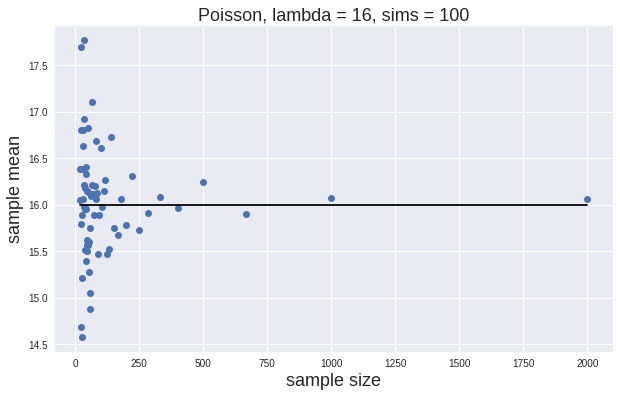

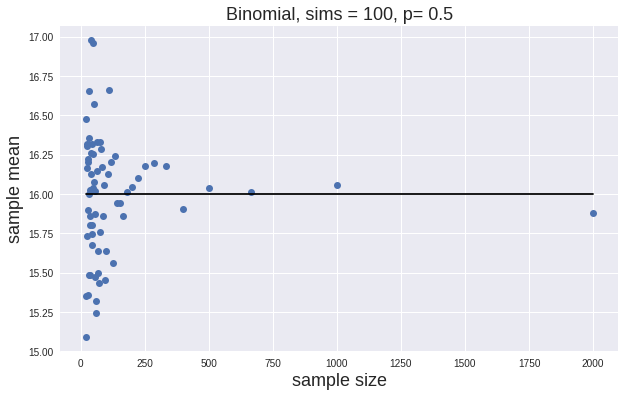

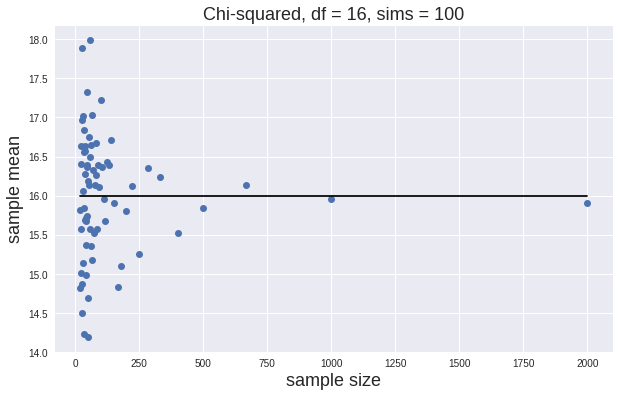

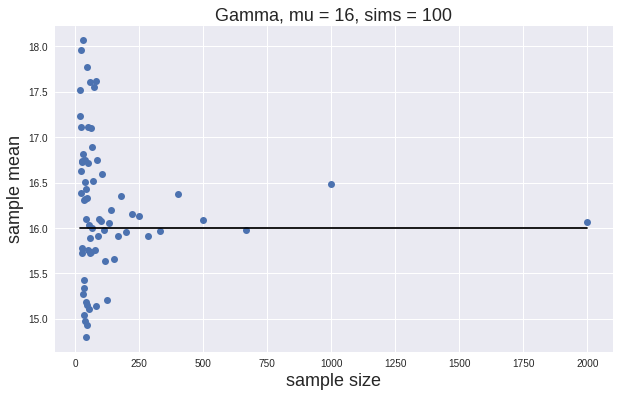

In [11]:
# Gaussian
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axgaus_mu_n.plot(distdict['gaus']['means'].keys(), distdict['gaus']['means'].values(), 'o')
axgaus_mu_n.set_xlabel('sample size', fontsize=18)
axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
axgaus_mu_n.set_title("Gaussian, mu = {}, sims = {}".format(mymean,sims), fontsize=18)
axgaus_mu_n.plot([min(sampsizes), max(sampsizes)], [mymean, mymean], 'k')

# Poisson
#scatter plot
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axpois_mu_n.plot(distdict['pois']['means'].keys(), distdict['pois']['means'].values(), 'o')
axpois_mu_n.set_xlabel('sample size', fontsize=18)
axpois_mu_n.set_ylabel('sample mean', fontsize=18)
axpois_mu_n.set_title("Poisson, lambda = {}, sims = {}".format(mymean,sims), fontsize=18)
axpois_mu_n.plot([min(sampsizes), max(sampsizes)], [mymean, mymean], 'k')


# Binomial
## scatter plot
axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axbinom_mu_n.plot(distdict['binomial']['means'].keys(), distdict['binomial']['means'].values(), 'o')
axbinom_mu_n.set_xlabel('sample size', fontsize=18)
axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
axbinom_mu_n.set_title("Binomial, sims = {}, p= 0.5".format(sims), fontsize=18)
axbinom_mu_n.plot([min(sampsizes), max(sampsizes)], [mymean, mymean], 'k')


# Chi-squared
## scatter plot
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axchisq_mu_n.plot(distdict['chisq']['means'].keys(), distdict['chisq']['means'].values(), 'o')
axchisq_mu_n.set_xlabel('sample size', fontsize=18)
axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title("Chi-squared, df = {}, sims = {}".format(mymean,sims), fontsize=18)
axchisq_mu_n.plot([min(sampsizes), max(sampsizes)], [mymean, mymean], 'k')


# Gamma
## scatter plot
axgamma_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axgamma_mu_n.plot(distdict['gamma']['means'].keys(), distdict['gamma']['means'].values(), 'o')
axgamma_mu_n.set_xlabel('sample size', fontsize=18)
axgamma_mu_n.set_ylabel('sample mean', fontsize=18)
axgamma_mu_n.set_title("Gamma, mu = {}, sims = {}".format(mymean,sims), fontsize=18)
axgamma_mu_n.plot([min(sampsizes), max(sampsizes)], [mymean, mymean], 'k')


__Fig 1. __ Five plots that show the distribution of means for different size samples that come from five different distributions. Plots show that as the sample size increases mean of the sample will close approximate the mean of the population. Additionally, the distribution of the sampling means approximate a normal distribution.

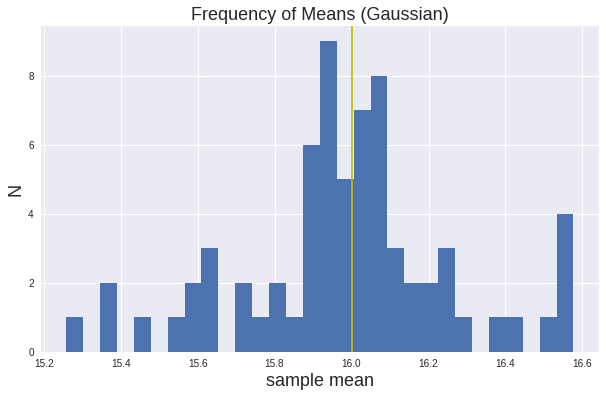

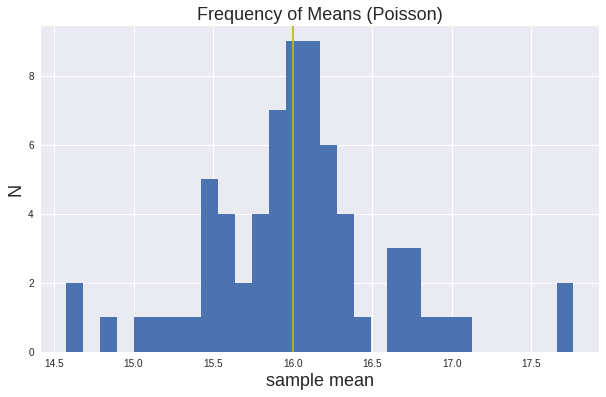

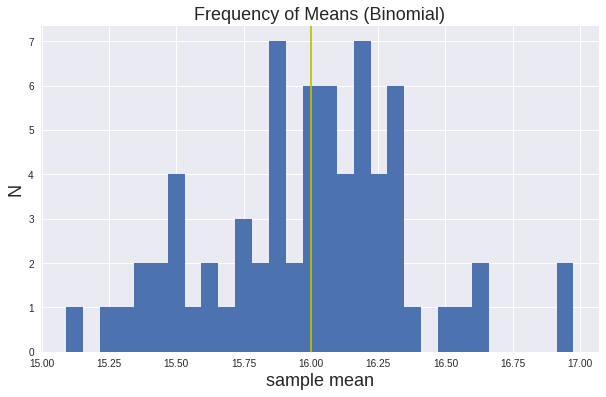

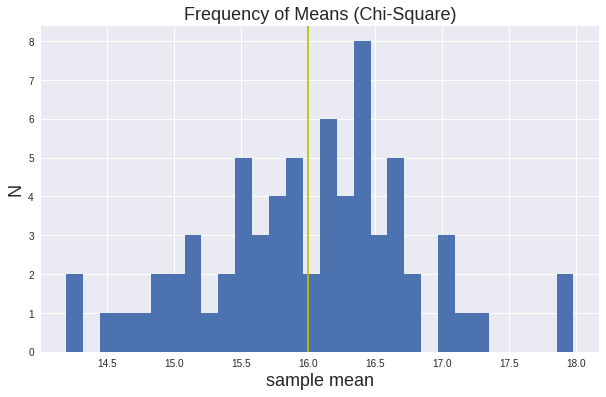

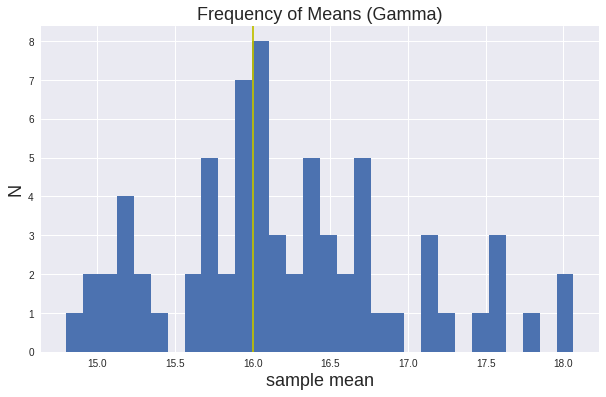

In [12]:
# Gaussian
## histogram
gaus_means = list(distdict['gaus']['means'].values())
pl.figure(figsize=(10, 6))
pl.hist(gaus_means,bins=30)
pl.title("Frequency of Means (Gaussian)", fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
plt.axvline(x= mymean, color='y')

# Poisson
## histogram
pois_means = list(distdict['pois']['means'].values())
pl.figure(figsize=(10, 6))
pl.hist(pois_means,bins=30)
pl.title("Frequency of Means (Poisson)", fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
plt.axvline(x= mymean, color= 'y')


# Binomial
## histogram
binom_means = list(distdict['binomial']['means'].values())
pl.figure(figsize=(10, 6))
pl.hist(binom_means,bins=30)
pl.title("Frequency of Means (Binomial)", fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
plt.axvline(x= mymean, color= 'y')


# Chi-squared
## histogram
chisq_means = list(distdict['chisq']['means'].values())
pl.figure(figsize=(10, 6))
pl.hist(chisq_means,bins=30)
pl.title("Frequency of Means (Chi-Square)", fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
plt.axvline(x= mymean, color= 'y')


# Gamma
## histogram
gamma_means = list(distdict['gamma']['means'].values())
pl.figure(figsize=(10, 6))
pl.hist(gamma_means,bins=30)
pl.title("Frequency of Means (Gamma)", fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
plt.axvline(x= mymean, color= 'y')


__Fig 2. __ Histograms the distribution of means for different size samples that come from five different distributions. Plots show that as the sample size increases mean of the sample will close approximate the mean of the population. The yellow line is the theoretical population mean (16).